In [1]:
!pip install drain3 transformers torch scikit-learn pandas numpy

  Preparing metadata (setup.py) ... done
  Created wheel for drain3: filename=drain3-0.9.11-py3-none-any.whl size=23998 sha256=15bc668ee7d454af64b35bb81f1439e85a921ff0a54904dfcb5d9cbdefe47f0e
  Stored in directory: /root/.cache/pip/wheels/82/5a/0b/8da60e57018f6b933535590bedba43ca0fd5cf41a0e68f8e11
Successfully built drain3
  Attempting uninstall: jsonpickle
    Found existing installation: jsonpickle 4.0.0
    Uninstalling jsonpickle-4.0.0:
      Successfully uninstalled jsonpickle-4.0.0
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.5.0
    Uninstalling cachetools-5.5.0:
      Successfully uninstalled cachetools-5.5.0


In [2]:
import requests
import tarfile
import os

# URL of the TAR file
url = "https://zenodo.org/records/8196385/files/OpenStack.tar.gz?download=1"
output_dir = "/content/sample_data/OpenStack"

# Step 1: Download the TAR file
tar_path = "/content/OpenStack/OpenStack.tar.gz"
response = requests.get(url, stream=True)
with open(tar_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)
print("Download completed.")

# Step 2: Extract the TAR file
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=output_dir)
print("Extraction completed.")

# Step 3: List the contents of the extracted folder
extracted_files = os.listdir(output_dir)
print("Extracted files:", extracted_files)

# Step 4: Count the number of records in each file
print("\nNumber of records in each file:")
for file_name in extracted_files:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):  # Only process regular files
        try:
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                line_count = sum(1 for line in f)
            print(f"{file_name}: {line_count} records")
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

Download completed.
Extraction completed.
Extracted files: ['openstack_normal1.log', 'openstack_normal2.log', 'openstack_abnormal.log', 'anomaly_labels.txt']

Number of records in each file:
openstack_normal1.log: 52312 records
openstack_normal2.log: 137074 records
openstack_abnormal.log: 18434 records
anomaly_labels.txt: 6 records


Download completed.
Extraction completed.
Extracted files: ['openstack_normal1.log', 'openstack_normal2.log', 'openstack_abnormal.log', 'anomaly_labels.txt']

File Statistics:
                file_name  line_count  file_size_kb
0   openstack_normal1.log       52312      15136.32
1   openstack_normal2.log      137074      39557.00
2  openstack_abnormal.log       18434       5308.71
3      anomaly_labels.txt           6          0.24

Sample lines from openstack_normal1.log:
nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:00.008 25746 INFO nova.osapi_compute.wsgi.server [req-38101a0b-2096-447d-96ea-a692162415ae 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2477829
nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:00.272 25746 INFO nova.osapi_compute.wsgi.server [req-9bc36dd9-91c5-4314-898a-47625eb93b09 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40

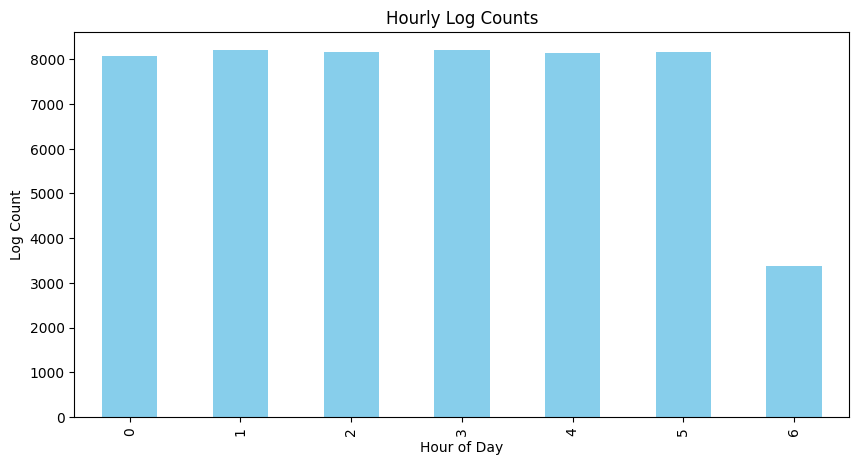


Most Frequent Words:
[('-', 130234), ('2017-05-16', 52326), ('INFO', 51431), ('-]', 48097), ('113d3a99c3da401fbd62cc2caa5b96d2', 28700), ('54fadb412c4e40cdbaed9335e4c35a9e', 28700), ('nova-api.log.1.2017-05-16_13:53:08', 27739), ('HTTP/1.1"', 26624), ('status:', 26624), ('len:', 26624)]

Entity Counts:
Total UUIDs: 49786
Total IP Addresses: 26624

Service-Level Log Counts:
nova: 52312
neutron: 0
cinder: 0
keystone: 3
glance: 0
swift: 0
heat: 0

Total Anomalous Logs: 26

Sample Anomalous Logs:
['nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task [req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - - - -] Error during ComputeManager._run_image_cache_manager_pass\n', 'nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task Traceback (most recent call last):\n', 'nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task   File "/usr/lib/python2.7/dist-packages

In [4]:
import os
import tarfile
import requests
import pandas as pd
import re
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download and extract the TAR file
url = "https://zenodo.org/records/8196385/files/OpenStack.tar.gz?download=1"
output_dir = "/content/sample_data/OpenStack"
tar_path = "/content/OpenStack/OpenStack.tar.gz"

# Download TAR file
response = requests.get(url, stream=True)
os.makedirs("/content/OpenStack", exist_ok=True)
with open(tar_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)
print("Download completed.")

# Extract TAR file
os.makedirs(output_dir, exist_ok=True)
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=output_dir)
print("Extraction completed.")

# List extracted files
extracted_files = os.listdir(output_dir)
print("Extracted files:", extracted_files)

# File statistics
file_stats = []
for file_name in extracted_files:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            lines = f.readlines()
            line_count = len(lines)
            file_size = os.path.getsize(file_path) / 1024  # Size in KB
            sample_lines = lines[:5]  # Inspect first 5 lines
            file_stats.append({
                "file_name": file_name,
                "line_count": line_count,
                "file_size_kb": round(file_size, 2),
                "sample_lines": sample_lines
            })
df_stats = pd.DataFrame(file_stats)
print("\nFile Statistics:")
print(df_stats[["file_name", "line_count", "file_size_kb"]])

# Display sample lines from each file
for index, row in df_stats.iterrows():
    print(f"\nSample lines from {row['file_name']}:")
    for line in row["sample_lines"]:
        print(line.strip())

# Analyze log components in the first file
if not df_stats.empty:
    first_file_path = os.path.join(output_dir, df_stats.iloc[0]["file_name"])
    with open(first_file_path, "r", encoding="utf-8", errors="ignore") as f:
        logs = f.readlines()

    # Extract log levels
    log_levels = [re.search(r'\b(INFO|WARNING|ERROR|DEBUG|CRITICAL)\b', log) for log in logs]
    log_levels = [match.group(0) for match in log_levels if match]

    # Extract timestamps
    timestamps = [re.search(r'\b(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})\b', log) for log in logs]
    timestamps = [datetime.strptime(match.group(1), '%Y-%m-%d %H:%M:%S') for match in timestamps if match]

    # Log Level Counts
    log_level_counts = pd.Series(log_levels).value_counts()
    print("\nLog Level Counts:")
    print(log_level_counts)

    # Time-based patterns
    df_timestamps = pd.DataFrame({'timestamp': timestamps})
    df_timestamps['hour'] = df_timestamps['timestamp'].dt.hour
    hourly_counts = df_timestamps['hour'].value_counts().sort_index()
    print("\nHourly Log Counts:")
    print(hourly_counts)

    # Plot hourly log counts
    plt.figure(figsize=(10, 5))
    hourly_counts.plot(kind='bar', color='skyblue', title='Hourly Log Counts')
    plt.xlabel('Hour of Day')
    plt.ylabel('Log Count')
    plt.show()

    # Frequent log messages
    word_counts = Counter(" ".join(logs).split())
    print("\nMost Frequent Words:")
    print(word_counts.most_common(10))

    # Entity Extraction
    uuids = [re.search(r'\b[0-9a-fA-F-]{36}\b', log).group(0) for log in logs if re.search(r'\b[0-9a-fA-F-]{36}\b', log)]
    ip_addresses = [re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', log).group(0) for log in logs if re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', log)]
    print("\nEntity Counts:")
    print(f"Total UUIDs: {len(uuids)}")
    print(f"Total IP Addresses: {len(ip_addresses)}")

    # Service-Level Statistics
    services = ['nova', 'neutron', 'cinder', 'keystone', 'glance', 'swift', 'heat']
    service_counts = {service: sum(1 for log in logs if service in log) for service in services}
    print("\nService-Level Log Counts:")
    for service, count in service_counts.items():
        print(f"{service}: {count}")

    # Anomaly Detection
    anomaly_keywords = ["failed", "timeout", "critical", "error"]
    anomalous_logs = [log for log in logs if any(keyword in log.lower() for keyword in anomaly_keywords)]
    print(f"\nTotal Anomalous Logs: {len(anomalous_logs)}")
    print("\nSample Anomalous Logs:")
    print(anomalous_logs[:5])


In [3]:
normal_log_filename1 = "/content/sample_data/OpenStack/openstack_normal1.log"
normal_log_filename2 = "/content/sample_data/OpenStack/openstack_normal2.log"
abnormal_log_filename = "/content/sample_data/OpenStack/openstack_abnormal.log"

In [4]:
with open(normal_log_filename1, 'r') as file:
    log_data = file.readlines()
normal_logs1 = [line.strip() for line in log_data if line.strip()]

with open(normal_log_filename2, 'r') as file:
    log_data = file.readlines()
normal_logs2 = [line.strip() for line in log_data if line.strip()]

normal_logs = normal_logs1 + normal_logs2

with open(abnormal_log_filename, 'r') as file:
    log_data = file.readlines()
abnormal_logs = [line.strip() for line in log_data if line.strip()]

In [5]:
import re

def clean_and_normalize_log(logs):
    cleaned_logs = []
    log_line_pattern = r""" (?P<log_file>[\w-]+\.log\.\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2})\s (?P<log_timestamp>\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{3})\s (?P<pid>\d+)\s (?P<level>\w+)\s (?P<logger>[\w\.]+)\s \[(?P<req_id>req-[\w-]+)\s-\s-\s-\s-\s-\] \s (?P<message>.*) """

    for log in logs:
        match = re.match(log_line_pattern, log.strip(), re.VERBOSE)
        if match:
          log_data = match.groupdict()
          cleaned_logs.append(log_data.get("message"))
    return cleaned_logs

normal = clean_and_normalize_log(normal_logs)
abnormal = clean_and_normalize_log(abnormal_logs)

In [6]:
import pandas as pd

data = []
for log in normal:
    data.append({"log": log.strip(), "label": 0})  # 0 for normal
for log in abnormal:
    data.append({"log": log.strip(), "label": 1})  # 1 for abnormal

# Create DataFrame
df_logs = pd.DataFrame(data)

# Print the first few rows
print(df_logs.head())

# Generate label counts
label_counts = df_logs['label'].value_counts()

# Display label counts
print("\nLabel Counts:")
print(label_counts)

# Optional: Label counts with descriptions
print("\nDetailed Label Counts:")
print(f"Normal logs (label=0): {label_counts.get(0, 0)}")
print(f"Abnormal logs (label=1): {label_counts.get(1, 0)}")



                                                 log  label
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0
2  Active base files: /var/lib/nova/instances/_ba...      0
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0

Label Counts:
label
0    13662
1     5936
Name: count, dtype: int64

Detailed Label Counts:
Normal logs (label=0): 13662
Abnormal logs (label=1): 5936


In [7]:
from drain3 import TemplateMiner
from drain3.template_miner_config import TemplateMinerConfig

# Initialize Drain
config = TemplateMinerConfig()
template_miner = TemplateMiner(config=config)

# Parse logs and generate structured templates
log_sequences = []
template_ids = []

for log in df_logs["log"]:
    result = template_miner.add_log_message(log)
    log_sequences.append(result["template_mined"])
    template_ids.append(result["cluster_id"])

# Add parsed templates and IDs to DataFrame
df_logs["template"] = log_sequences
df_logs["template_id"] = template_ids

print(df_logs.head())

                                                 log  label  \
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0   
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0   
2  Active base files: /var/lib/nova/instances/_ba...      0   
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0   
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0   

                                            template  template_id  
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...            1  
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...            2  
2  Active base files: /var/lib/nova/instances/_ba...            3  
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...            4  
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...            5  


In [8]:
from sklearn.model_selection import train_test_split

# Convert template IDs to sequences for LogBERT
df_logs["sequence"] = df_logs["template_id"].astype(str)  # Use template IDs as sequence

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_logs["sequence"].tolist(),
    df_logs["label"].tolist(),
    test_size=0.2,
    random_state=42
)

In [9]:
from transformers import BertTokenizer
from torch.utils.data import Dataset

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class LogDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Create datasets
train_dataset = LogDataset(train_texts, train_labels, tokenizer)
val_dataset = LogDataset(val_texts, val_labels, tokenizer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [10]:
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader
import torch

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 0.4082
Epoch 2/3, Loss: 0.3912
Epoch 3/3, Loss: 0.3911


In [30]:
from sklearn.metrics import accuracy_score

# Validation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8520


Validation Accuracy: 0.8520

Confusion Matrix:
[[2729    3]
 [ 577  611]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90      2732
   Anomalous       1.00      0.51      0.68      1188

    accuracy                           0.85      3920
   macro avg       0.91      0.76      0.79      3920
weighted avg       0.88      0.85      0.84      3920



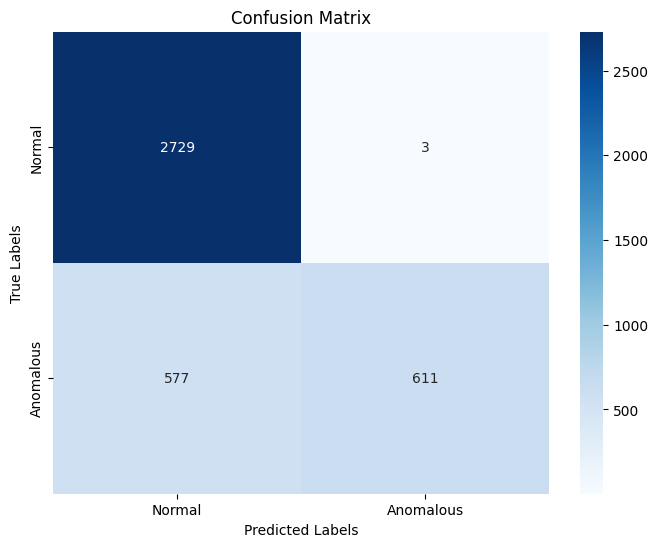

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Validation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(all_labels, all_preds, target_names=["Normal", "Anomalous"])
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [12]:
model.save_pretrained("log_anomaly_detection_model")
tokenizer.save_pretrained("log_anomaly_detection_model")

('log_anomaly_detection_model/tokenizer_config.json',
 'log_anomaly_detection_model/special_tokens_map.json',
 'log_anomaly_detection_model/vocab.txt',
 'log_anomaly_detection_model/added_tokens.json')

In [13]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    model.eval()
    tokens = tokenizer(
        sequence,  # Sequence should be a single string
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Test log sequences
test_normal_log_sequence = (
    "image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at (/var/lib/nova/instances/_base/a489c868f0c37da93b76227c91bb03908ac0e742): "
    "in use: on this node 1 local, 0 on other nodes sharing this instance storage"
)
prediction = predict(test_normal_log_sequence, model, tokenizer)
print("Anomaly" if prediction == 1 else "Normal")

test_anomalous_log_sequence = (
    "Error: Instance 0673dd71-34c5-4fbb-86c4-40623fbe45b4 failed to launch due to insufficient storage."
)
prediction = predict(test_anomalous_log_sequence, model, tokenizer)
print("Anomaly" if prediction == 1 else "Normal")


Normal
Normal


In [14]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4


In [15]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer
import openai
import os
from google.colab import userdata

# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.")

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    """
    Predicts if the given log sequence is Anomalous (1) or Normal (0).
    """
    model.eval()
    tokens = tokenizer(
        sequence,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Function to perform root cause analysis using OpenAI LLM
def root_cause_analysis(log_message):
    """
    Sends the anomaly log to OpenAI LLM for a detailed RCA.
    """
    try:
        prompt = f"""
        You are an expert in IT operations and log analysis. Analyze the following log anomaly and provide a detailed root cause analysis:

        Log anomaly:
        {log_message}

        Root Cause Analysis:
        """
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a root cause analysis expert."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.2,  # Low temperature for consistent output
            max_tokens=300
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"Error during RCA generation: {e}"

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Test log sequence
test_log_sequence = (
    "Error: Instance 0673dd71-34c5-4fbb-86c4-40623fbe45b4 failed to launch due to insufficient storage."
)

# Predict if the log is anomalous
prediction = predict(test_log_sequence, model, tokenizer)
if prediction == 1:  # Anomalous
    print("Prediction: Anomaly detected.")
    # Perform RCA for the anomaly
    rca_result = root_cause_analysis(test_log_sequence)
    print("Detailed RCA:\n", rca_result)
else:
    print("Prediction: Normal log.")


Prediction: Normal log.


In [16]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [4]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer
import openai
import gradio as gr
from google.colab import userdata
import os


# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.") # Replace with your OpenAI API key

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    """
    Predicts if the given log sequence is Anomalous (1) or Normal (0).
    """
    model.eval()
    tokens = tokenizer(
        sequence,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Function to perform root cause analysis using OpenAI LLM
def root_cause_analysis(log_message):
    """
    Sends the anomaly log to OpenAI LLM for a detailed RCA.
    """
    try:
        prompt = f"""
        You are an expert in IT operations and log analysis. Analyze the following log anomaly and provide a detailed root cause analysis:

        Log anomaly:
        {log_message}

        Root Cause Analysis:
        """
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a root cause analysis expert."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.2,  # Low temperature for consistent output
            max_tokens=300
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"Error during RCA generation: {e}"

# Gradio interface function
def analyze_log(log_message):
    """
    Classifies the log as normal or anomaly and generates RCA for anomalies.
    """
    prediction = predict(log_message, model, tokenizer)
    if prediction == 1:  # Anomalous
        rca_result = root_cause_analysis(log_message)
        return "Anomaly Detected", rca_result
    else:
        return "Normal Log", "No RCA required for normal logs."

# Create Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("### Log Analysis and RCA")

    with gr.Row():
        log_input = gr.Textbox(label="Log Message", placeholder="Enter a log message", lines=3)

    with gr.Row():
        submit_button = gr.Button("Analyze Log")

    with gr.Row():
        prediction_output = gr.Textbox(label="Log Classification", interactive=False)
        rca_output = gr.Textbox(label="Root Cause Analysis", interactive=False)

    # Connect function to Gradio components
    submit_button.click(analyze_log, inputs=log_input, outputs=[prediction_output, rca_output])

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7abf03479d44fcbdca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer
import openai
import gradio as gr
from google.colab import userdata
import os

# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.") # Replace with your OpenAI API key

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer, threshold=0.7):
    """
    Predicts if the given log sequence is Anomalous (1) or Normal (0) using a confidence threshold.
    """
    model.eval()
    tokens = tokenizer(
        sequence,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        anomaly_score = probabilities[0][1].item()  # Probability of anomaly (class 1)
        print(f"Anomaly Score: {anomaly_score}")  # Debugging

        if anomaly_score >= threshold:
            return 1  # Anomalous
        else:
            return 0  # Normal

# Function to perform root cause analysis using OpenAI LLM
def root_cause_analysis(log_message):
    """
    Sends the anomaly log to OpenAI LLM for a detailed RCA.
    """
    try:
        prompt = f"""
        You are an expert in IT operations and log analysis. Analyze the following log anomaly and provide a detailed root cause analysis:

        Log anomaly:
        {log_message}

        Root Cause Analysis:
        """
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a root cause analysis expert."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.2,  # Low temperature for consistent output
            max_tokens=300
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"Error during RCA generation: {e}"

# Gradio interface function
def analyze_log(log_message):
    """
    Classifies the log as normal or anomaly and generates RCA for anomalies.
    """
    prediction = predict(log_message, model, tokenizer)
    if prediction == 1:  # Anomalous
        rca_result = root_cause_analysis(log_message)
        return "Anomaly Detected", rca_result
    else:
        return "Normal Log", "No RCA required for normal logs."

# Create Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("### Log Analysis and RCA")

    with gr.Row():
        log_input = gr.Textbox(label="Log Message", placeholder="Enter a log message", lines=3)

    with gr.Row():
        submit_button = gr.Button("Analyze Log")

    with gr.Row():
        prediction_output = gr.Textbox(label="Log Classification", interactive=False)
        rca_output = gr.Textbox(label="Root Cause Analysis", interactive=False)

    # Connect function to Gradio components
    submit_button.click(analyze_log, inputs=log_input, outputs=[prediction_output, rca_output])

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0ed6fa7e5f4d4cc88f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [2]:
import gradio as gr
import pandas as pd
import openai
from google.colab import userdata
import os

# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.") # Replace with your OpenAI API key


# Function to classify logs and perform RCA
def process_logs(file):
    """
    Processes the uploaded .log file, classifies each log as normal or anomaly using OpenAI,
    and generates RCA for anomalies.
    """
    # Read the uploaded file
    try:
        with open(file.name, "r") as f:
            logs = f.readlines()
    except Exception as e:
        return None, f"Error reading file: {e}"

    data = []
    rca_results = []

    # Loop through each log
    for log in logs:
        log = log.strip()  # Remove leading/trailing whitespace
        if not log:
            continue  # Skip empty lines

        # Use OpenAI LLM to classify the log
        try:
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": "You are an expert in IT log analysis."},
                    {
                        "role": "user",
                        "content": f"Classify the following log as 'Normal' or 'Anomalous':\n{log}"
                    },
                ],
                temperature=0.2,
                max_tokens=50,
            )
            classification = response["choices"][0]["message"]["content"].strip()

        except Exception as e:
            classification = f"Error: {e}"

        # Append to data
        data.append({"log": log, "classification": classification})

        # If anomalous, generate RCA
        if classification == "Anomalous":
            try:
                rca_response = openai.ChatCompletion.create(
                    model="gpt-3.5-turbo",
                    messages=[
                        {"role": "system", "content": "You are an expert in IT root cause analysis."},
                        {
                            "role": "user",
                            "content": f"Provide a detailed root cause analysis for the following anomalous log:\n{log}",
                        },
                    ],
                    temperature=0.2,
                    max_tokens=300,
                )
                rca = rca_response["choices"][0]["message"]["content"].strip()
            except Exception as e:
                rca = f"Error during RCA generation: {e}"

            rca_results.append({"log": log, "root_cause_analysis": rca})

    # Create a DataFrame for logs and RCA results
    df_logs = pd.DataFrame(data)
    df_rca = pd.DataFrame(rca_results)

    # Save RCA results to a CSV file
    output_csv = "/content/rca_results.csv"
    df_rca.to_csv(output_csv, index=False)

    return df_logs, output_csv

# Gradio UI
def gradio_interface(file):
    df_logs, rca_csv = process_logs(file)
    if df_logs is None:
        return "Error processing file.", None

    # Display classification results
    log_summary = df_logs.to_markdown(index=False)

    # Return log summary and CSV file for download
    return log_summary, rca_csv

# Gradio app
with gr.Blocks() as demo:
    gr.Markdown("### Log Classification and RCA Generator")
    gr.Markdown(
        "Upload a `.log` file containing normal and anomalous logs. "
        "The app will classify the logs and generate a CSV with Root Cause Analysis for anomalies."
    )

    with gr.Row():
        log_file = gr.File(label="Upload .log File")

    with gr.Row():
        submit_button = gr.Button("Analyze Logs")

    with gr.Row():
        classification_output = gr.Textbox(label="Log Classification Results", lines=15, interactive=False)
        download_link = gr.File(label="Download RCA CSV")

    submit_button.click(gradio_interface, inputs=log_file, outputs=[classification_output, download_link])

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://92b4e1d7e0b9f7e1db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
